In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('personas.csv')
df.head()

,altura,peso,ingreso,horas_trabajadas,ausencias
0,134.433878,70.617864,9973.577534,40.905476,4
1,167.158746,109.268295,8961.047249,41.576483,4
2,141.480812,81.034644,7437.977263,41.369239,5
3,123.227119,57.884172,12064.915290,41.537211,3
4,143.554951,93.581093,9296.396167,40.441203,4


In [5]:
df.corr(method='pearson')

,altura,peso,ingreso,horas_trabajadas,ausencias
altura,1.000000,0.930608,-0.025283,0.008547,0.025587
peso,0.930608,1.000000,-0.029852,-0.002483,0.027450
ingreso,-0.025283,-0.029852,1.000000,0.625514,-0.973104
horas_trabajadas,0.008547,-0.002483,0.625514,1.000000,-0.603870
ausencias,0.025587,0.027450,-0.973104,-0.603870,1.000000


# Correlación:

1. Relaciones positivas muy fuertes: 

    + Altura vs peso: Esta es una correlacion extremadamente fuerte. Confirma lo esperado: A mayor altura, consistentemente mayor peso. Se mueven casi perfectamente juntas
    + Para la regresion: Un sns.regplot de estas dos variables mostraria puntos muy pedagos a la linea de regresion

2. Relaciones negativas muy fuertes:

    + Ingresos vs ausencias (-0.973104): Esta es la correlacion mas fuerte de la tabla y es negativa. Significa que hay una relacion inversa casi perfecta. "A medida que aumentan las ausencias, los ingresos caen drasticamente"

3. Relaciones moderadas/fuertes:

    + horas_trabajadas vs ingresos (0.603870): Es una relacion positiva moderadamente fuerte. Hay una tendencia clara: mas horas trabajadas suelen significar mas ingresos. La relacion es real, pero hay otros factores que influyen, por lo que no es perfecta

    + horas_trabajadas vs. ausencias (-0.603870): Relacion negativa moderada. Mas ausencias significan logicamente, menos horas trabajadas

4. Ausencias totales de relacion (cercanas a cero):

    + altura vs ingreso: (-0.025283) y otras con altura/peso: Estos numeros son practicamente cero. Significa que las alturas de una persona no tiene ninguna relacion con su ingreso, sus horas de trabajadas o sus ausencias. Es justo lo que esperarias en la vida real.

RESUMEN : 

    * Si se busca predecir: Usar las variables con correlacion mas cercanas a 1 o -1. 
    * Si no hay correlacion (cerca de 0): usar altura para predecir ingresos en un sns.regplot generaria una linea de regresion horizontal, lo cual indica que el modelo no es util

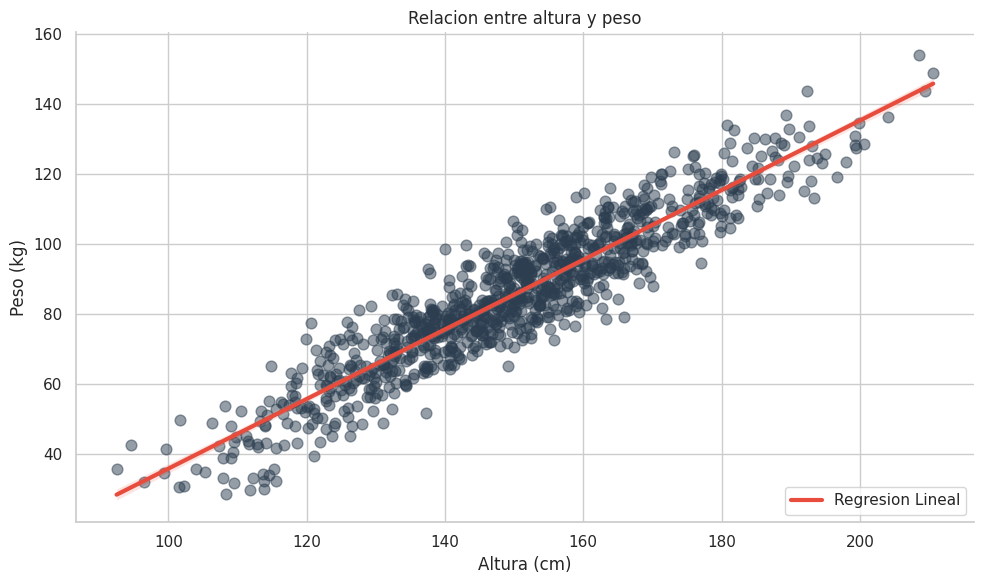

In [26]:
sns.set_theme(style='whitegrid')                # Fondo limpio con rekilla
plt.figure(figsize=(10, 6))                     # tamaño del grafico, 10 de ancho y 6 de alto

altura_peso_grafico = sns.regplot(
    x='altura',                     # eje x va altura
    y='peso',                       # eje y va peso
    data=df,                        # datos que voy a usar
    scatter_kws={'alpha': 0.5, 'color':  '#2c3e50', 's': 60}, # alpha es la transparencia y s es el tamaño de los puntos
    line_kws={'color': '#e74c3c', 'linewidth': 3, 'label': 'Regresion Lineal'}
    )

plt.title('Relacion entre altura y peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(loc='lower right') # Mostrar la leyenda de la línea
sns.despine() # Eliminar los bordes superior y derecho para un look moderno
plt.tight_layout()
plt.show()